In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS7643\ Deep\ Learning\ Project/RelTR

/content/drive/.shortcut-targets-by-id/1qHoaQqsa_84wKp4XFuiBiBUnxjcdMWJm/CS7643 Deep Learning Project/RelTR


In [ ]:
!pip install scipy
!pip install torch==1.6.0 torchvision==0.7.0 cudatoolkit==10.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

ERROR: Could not find a version that satisfies the requirement torch==1.6.0 (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch==1.6.0
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-lnin9qaq
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-lnin9qaq
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp311-cp311-linux_x86_64.whl size=395986 sha256=79e867b35e28ecf89852740c40883bff230a0614ff0c23841e816df810331363
  Stored in directory: /tmp/pip-ephem-wheel-cache-ekk__xya/wheels/6d/69/75/358c50a37672dfda8d74ba3b30ec49fb75d52f7c081886d503
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found ex

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T

from PIL import Image
import requests
import matplotlib.pyplot as plt

In [ ]:
%cd lib/fpn/box_intersections_cpu

/content/drive/.shortcut-targets-by-id/1qHoaQqsa_84wKp4XFuiBiBUnxjcdMWJm/CS7643 Deep Learning Project/RelTR/lib/fpn/box_intersections_cpu


In [ ]:
!python setup.py build_ext --inplace

# Evaluation

In [ ]:
%cd /content/drive/MyDrive/CS7643\ Deep\ Learning\ Project/RelTR
!python main.py --dataset vg --img_folder data/vg/images/ --ann_path data/vg/ --eval --batch_size 1 --resume ckpt/checkpoint0149.pth

/content/drive/.shortcut-targets-by-id/1qHoaQqsa_84wKp4XFuiBiBUnxjcdMWJm/CS7643 Deep Learning Project/RelTR
Not using distributed mode
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
git:
  sha: N/A, status: clean, branch: N/A

Namespace(lr=0.0001, lr_backbone=1e-05, batch_size=1, weight_decay=0.0001, epochs=150, lr_drop=100, clip_max_norm=0.1, frozen_weights=None, backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=6, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_entities=100, num_triplets=200, pre_norm=False, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, set_iou_threshold=0.7, bbox_loss_coef=5, giou_loss_coef=2, rel_loss_coef=1, eos_coef=0.1, dataset='vg', ann_path='data/vg/', img_folder='data/vg/images/', output_dir='', device='cuda', seed=42, resume='ckpt/checkpoint0149.pth', start_epoch=0, eval=True, num_work

#Inference Example

In [ ]:
CLASSES = [ 'N/A', 'airplane', 'animal', 'arm', 'bag', 'banana', 'basket', 'beach', 'bear', 'bed', 'bench', 'bike',
                'bird', 'board', 'boat', 'book', 'boot', 'bottle', 'bowl', 'box', 'boy', 'branch', 'building',
                'bus', 'cabinet', 'cap', 'car', 'cat', 'chair', 'child', 'clock', 'coat', 'counter', 'cow', 'cup',
                'curtain', 'desk', 'dog', 'door', 'drawer', 'ear', 'elephant', 'engine', 'eye', 'face', 'fence',
                'finger', 'flag', 'flower', 'food', 'fork', 'fruit', 'giraffe', 'girl', 'glass', 'glove', 'guy',
                'hair', 'hand', 'handle', 'hat', 'head', 'helmet', 'hill', 'horse', 'house', 'jacket', 'jean',
                'kid', 'kite', 'lady', 'lamp', 'laptop', 'leaf', 'leg', 'letter', 'light', 'logo', 'man', 'men',
                'motorcycle', 'mountain', 'mouth', 'neck', 'nose', 'number', 'orange', 'pant', 'paper', 'paw',
                'people', 'person', 'phone', 'pillow', 'pizza', 'plane', 'plant', 'plate', 'player', 'pole', 'post',
                'pot', 'racket', 'railing', 'rock', 'roof', 'room', 'screen', 'seat', 'sheep', 'shelf', 'shirt',
                'shoe', 'short', 'sidewalk', 'sign', 'sink', 'skateboard', 'ski', 'skier', 'sneaker', 'snow',
                'sock', 'stand', 'street', 'surfboard', 'table', 'tail', 'tie', 'tile', 'tire', 'toilet', 'towel',
                'tower', 'track', 'train', 'tree', 'truck', 'trunk', 'umbrella', 'vase', 'vegetable', 'vehicle',
                'wave', 'wheel', 'window', 'windshield', 'wing', 'wire', 'woman', 'zebra']

REL_CLASSES = ['__background__', 'above', 'across', 'against', 'along', 'and', 'at', 'attached to', 'behind',
                'belonging to', 'between', 'carrying', 'covered in', 'covering', 'eating', 'flying in', 'for',
                'from', 'growing on', 'hanging from', 'has', 'holding', 'in', 'in front of', 'laying on',
                'looking at', 'lying on', 'made of', 'mounted on', 'near', 'of', 'on', 'on back of', 'over',
                'painted on', 'parked on', 'part of', 'playing', 'riding', 'says', 'sitting on', 'standing on',
                'to', 'under', 'using', 'walking in', 'walking on', 'watching', 'wearing', 'wears', 'with']

In [ ]:
from models.backbone import Backbone, Joiner
from models.position_encoding import PositionEmbeddingSine
from models.transformer import Transformer
from models.reltr import RelTR

position_embedding = PositionEmbeddingSine(128, normalize=True)
backbone = Backbone('resnet50', False, False, False)
backbone = Joiner(backbone, position_embedding)
backbone.num_channels = 2048

transformer = Transformer(d_model=256, dropout=0.1, nhead=8,
                          dim_feedforward=2048,
                          num_encoder_layers=6,
                          num_decoder_layers=6,
                          normalize_before=False,
                          return_intermediate_dec=True)

model = RelTR(backbone, transformer, num_classes=151, num_rel_classes = 51,
              num_entities=100, num_triplets=200)

# The checkpoint is pretrained on Visual Genome
ckpt = torch.load('ckpt/checkpoint0149.pth')
model.load_state_dict(ckpt['model'])
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-6-7cd65e5d217f>:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detail

RelTR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerDecoderLayer(
          (self_attn_entity): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features

In [ ]:
# Some transformation functions
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
          (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

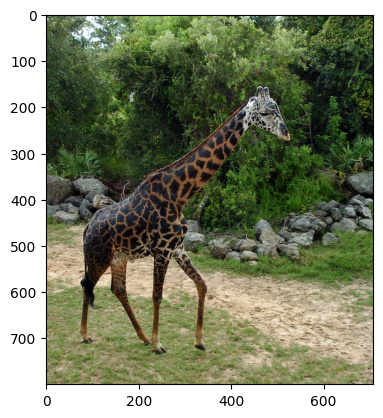

In [ ]:
img_path = 'demo/vg1.jpg'
im = Image.open(img_path)
plt.imshow(im)
img = transform(im).unsqueeze(0)

In [ ]:
# propagate through the model
outputs = model(img)

# keep only predictions with >0.3 confidence
probas = outputs['rel_logits'].softmax(-1)[0, :, :-1]
probas_sub = outputs['sub_logits'].softmax(-1)[0, :, :-1]
probas_obj = outputs['obj_logits'].softmax(-1)[0, :, :-1]
keep = torch.logical_and(probas.max(-1).values > 0.3, torch.logical_and(probas_sub.max(-1).values > 0.3,
                                                                        probas_obj.max(-1).values > 0.3))

In [ ]:
# convert boxes from [0; 1] to image scales
sub_bboxes_scaled = rescale_bboxes(outputs['sub_boxes'][0, keep], im.size)
obj_bboxes_scaled = rescale_bboxes(outputs['obj_boxes'][0, keep], im.size)

topk = 10 # display up to 10 images
keep_queries = torch.nonzero(keep, as_tuple=True)[0]
indices = torch.argsort(-probas[keep_queries].max(-1)[0] * probas_sub[keep_queries].max(-1)[0] * probas_obj[keep_queries].max(-1)[0])[:topk]
keep_queries = keep_queries[indices]

In [ ]:
# save the attention weights
conv_features, dec_attn_weights_sub, dec_attn_weights_obj = [], [], []
hooks = [
    model.backbone[-2].register_forward_hook(
        lambda self, input, output: conv_features.append(output)
    ),
    model.transformer.decoder.layers[-1].cross_attn_sub.register_forward_hook(
        lambda self, input, output: dec_attn_weights_sub.append(output[1])
    ),
    model.transformer.decoder.layers[-1].cross_attn_obj.register_forward_hook(
        lambda self, input, output: dec_attn_weights_obj.append(output[1])
    )]

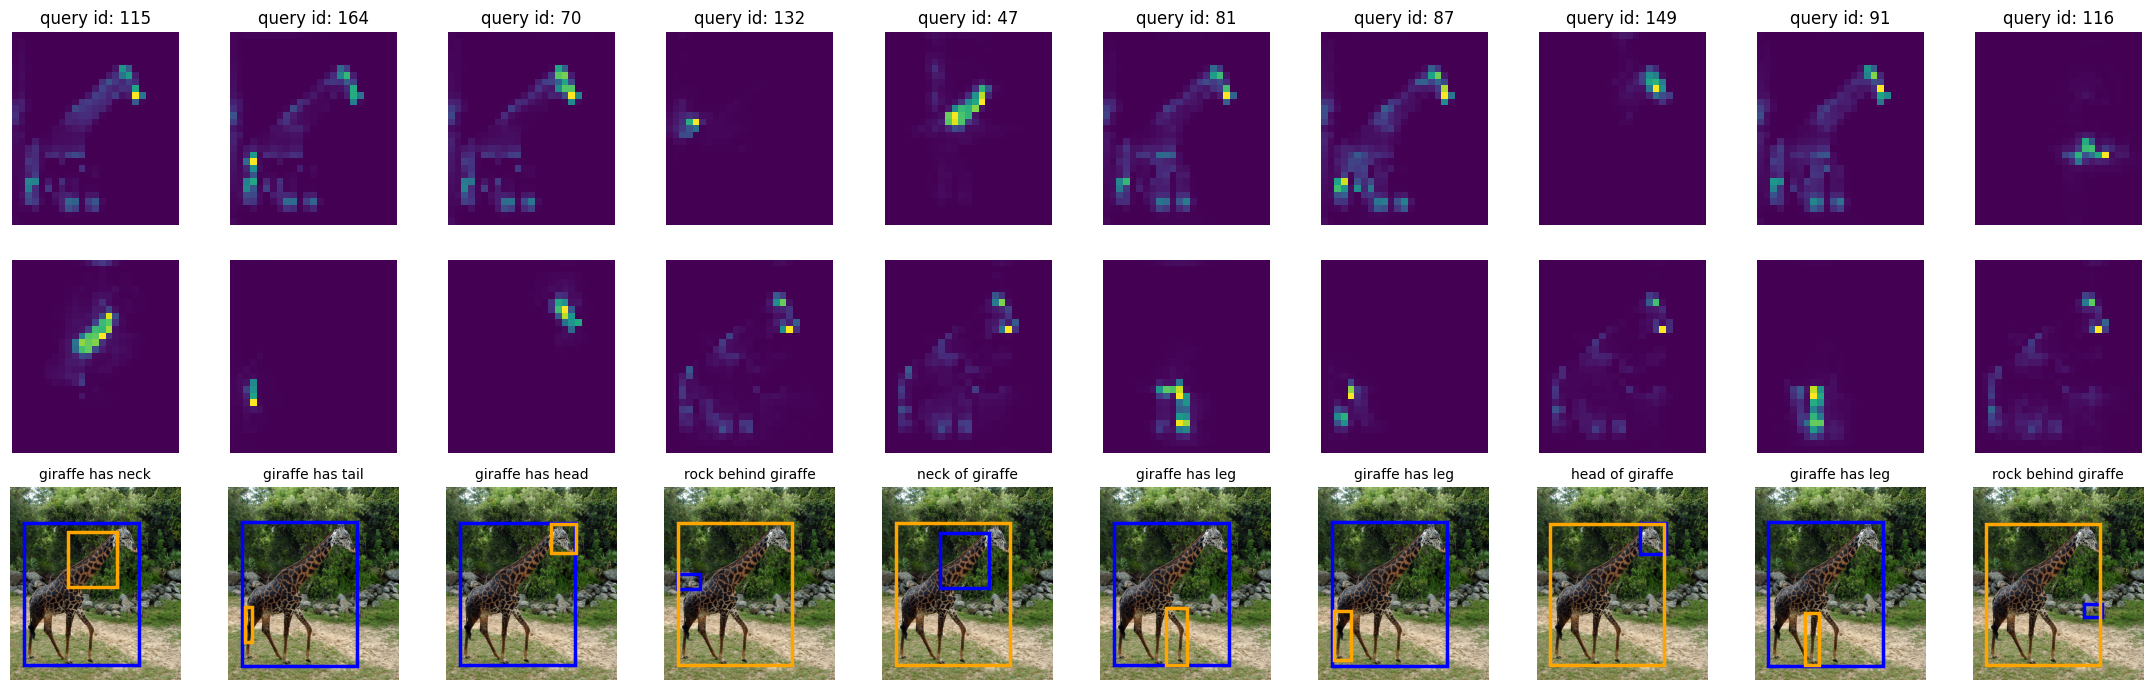

In [ ]:
with torch.no_grad():
    # propagate through the model
    outputs = model(img)

    for hook in hooks:
        hook.remove()

    # don't need the list anymore
    conv_features = conv_features[0]
    dec_attn_weights_sub = dec_attn_weights_sub[0]
    dec_attn_weights_obj = dec_attn_weights_obj[0]

    # get the feature map shape
    h, w = conv_features['0'].tensors.shape[-2:]
    im_w, im_h = im.size

    fig, axs = plt.subplots(ncols=len(indices), nrows=3, figsize=(22, 7))
    for idx, ax_i, (sxmin, symin, sxmax, symax), (oxmin, oymin, oxmax, oymax) in \
            zip(keep_queries, axs.T, sub_bboxes_scaled[indices], obj_bboxes_scaled[indices]):
        ax = ax_i[0]
        ax.imshow(dec_attn_weights_sub[0, idx].view(h, w))
        ax.axis('off')
        ax.set_title(f'query id: {idx.item()}')
        ax = ax_i[1]
        ax.imshow(dec_attn_weights_obj[0, idx].view(h, w))
        ax.axis('off')
        ax = ax_i[2]
        ax.imshow(im)
        ax.add_patch(plt.Rectangle((sxmin, symin), sxmax - sxmin, symax - symin,
                                    fill=False, color='blue', linewidth=2.5))
        ax.add_patch(plt.Rectangle((oxmin, oymin), oxmax - oxmin, oymax - oymin,
                                    fill=False, color='orange', linewidth=2.5))

        ax.axis('off')
        ax.set_title(CLASSES[probas_sub[idx].argmax()]+' '+REL_CLASSES[probas[idx].argmax()]+' '+CLASSES[probas_obj[idx].argmax()], fontsize=10)

    fig.tight_layout()
    plt.show() # show the output